In [ ]:
from google.colab import drive
drive.mount('/content/drive')

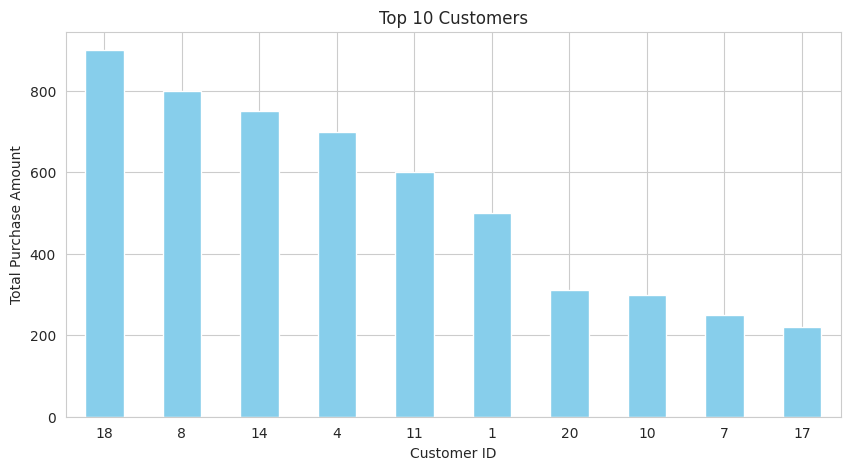

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from IPython.display import display, HTML

sns.set_style("whitegrid")

data = pd.read_excel("sales_data.xlsx")
data['Date'] = pd.to_datetime(data['Date'])

total_sales = data['Amount'].sum()
total_customers = data['CustomerID'].nunique()
total_products = data['ProductID'].nunique()
avg_sales_per_customer = total_sales / total_customers

display(HTML(f"""
<div style="display:flex; justify-content:space-around; margin-bottom:20px;">
    <div style="background-color:#4CAF50; color:white; padding:20px; border-radius:10px; width:20%; text-align:center;">
        <h3>Total Sales</h3>
        <h2>{total_sales}</h2>
    </div>
    <div style="background-color:#2196F3; color:white; padding:20px; border-radius:10px; width:20%; text-align:center;">
        <h3>Total Customers</h3>
        <h2>{total_customers}</h2>
    </div>
    <div style="background-color:#FF9800; color:white; padding:20px; border-radius:10px; width:20%; text-align:center;">
        <h3>Total Products</h3>
        <h2>{total_products}</h2>
    </div>
    <div style="background-color:#9C27B0; color:white; padding:20px; border-radius:10px; width:20%; text-align:center;">
        <h3>Avg Sales/Customer</h3>
        <h2>{avg_sales_per_customer:.2f}</h2>
    </div>
</div>
"""))

sales_trend = data.groupby('Date')['Amount'].sum()

category_sales = data.groupby('Category')['Amount'].sum().reset_index()

top_customers = data.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10)

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type":"xy"}, {"type":"domain"}]],
    subplot_titles=("Sales Trend Over Time", "Sales by Category")
)

fig.add_trace(
    go.Scatter(x=sales_trend.index, y=sales_trend.values, mode='lines+markers', name='Sales Trend', line=dict(color='green')),
    row=1, col=1
)

# Donut chart
fig.add_trace(
    go.Pie(labels=category_sales['Category'], values=category_sales['Amount'], hole=0.4, name='Category Sales'),
    row=1, col=2
)

fig.update_layout(height=400, showlegend=True)
fig.show()

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Customers")
plt.ylabel("Total Purchase Amount")
plt.xlabel("Customer ID")
plt.xticks(rotation=0)
plt.show()

display(HTML("""
<div style="background-color:#f1f1f1; padding:15px; border-radius:10px; margin-top:20px;">
<h3>Key Insights:</h3>
<ul>
<li>Highest sales categories are shown in the donut chart.</li>
<li>Top 10 customers contribute most to revenue.</li>
<li>Overall sales trend indicates growth or seasonality.</li>
</ul>
</div>
"""))
